# Net Present Value Analysis

The Net Present Value determines the present value of the future cash inflows and outflows over the life the project.

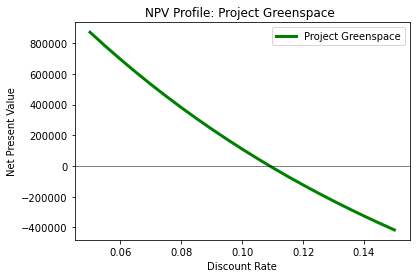

In [1]:

import matplotlib.pyplot as plt

# Update Project Greenspace Cash Flows Here
project_a = [-2000000, 0, 0, 250000, 250000, 500000, 500000, 750000, 750000, 1000000]

discount_rate = [0.05, 0.055, 0.06, 0.065, 0.07, 0.075, 0.08, 0.085, 0.09, 0.095, 0.1, 0.105, 0.11, 0.115, 0.12, 0.125, 0.13, 0.135, 0.14, 0.145, 0.15]

def calculate_npv(rate, cash_flow):
    npv = 0
    for t in range(len(cash_flow)):
        npv += cash_flow[t]/(1+rate)**t
    return npv

npvs_a = list()
for rate in discount_rate:
  npv_a = calculate_npv(rate,project_a)
  npvs_a.append(npv_a)
  
plt.plot(discount_rate,npvs_a, linewidth = 3.0, color = "green", label = "Project Greenspace")
plt.axhline(y=0, linewidth = 0.5, color = "black")
plt.title('NPV Profile: Project Greenspace ')
plt.xlabel('Discount Rate')
plt.ylabel('Net Present Value')
plt.legend()
plt.show()

# Analyzing Stock Data

You will calculate the rates of return from this data, as well as other key statistics such as variance and correlation for assessing risk.

## Utils

In [3]:
#utils 
from math import log, sqrt


# Calculate Log Return
def calculate_log_return(start_price, end_price):
  return log(end_price / start_price)


# Calculate Variance
def calculate_variance(dataset):
  mean = sum(dataset) / len(dataset)

  numerator = 0

  for data in dataset:
    numerator += (data - mean) ** 2

  return numerator / len(dataset)


# Calculate Standard Deviation
def calculate_stddev(dataset):
  variance = calculate_variance(dataset)
  return sqrt(variance)


# Calculate Correlation Coefficient
def calculate_correlation(set_x, set_y):
  sum_x = sum(set_x)
  sum_y = sum(set_y)

  sum_x2 = sum([x ** 2 for x in set_x])
  sum_y2 = sum([y ** 2 for y in set_y])

  sum_xy = sum([x * y for x, y in zip(set_x, set_y)])

  n = len(set_x)

  numerator = n * sum_xy - sum_x * sum_y
  denominator = sqrt((n * sum_x2 - sum_x ** 2) * (n * sum_y2 - sum_y ** 2))

  return numerator / denominator

In [4]:
def display_as_percentage(val):
  return '{:.1f}%'.format(val * 100)

amazon_prices = [1699.8, 1777.44, 2012.71, 2003.0, 1598.01, 1690.17, 1501.97, 1718.73, 1639.83, 1780.75, 1926.52, 1775.07, 1893.63]
ebay_prices = [35.98, 33.2, 34.35, 32.77, 28.81, 29.62, 27.86, 33.39, 37.01, 37.0, 38.6, 35.93, 39.5]

## Calculating Rate of Return

In [16]:
def get_returns(prices):
  returns = []
  for i in range(len(prices)-1):
    start_price = prices[i]
    end_price = prices[i+1]
    return_rate = calculate_log_return(start_price, end_price)
    returns.append(return_rate)
  return returns

In [20]:
amazon_returns = get_returns(amazon_prices)
ebay_returns = get_returns(ebay_prices)
amazon_returns, ebay_returns

([0.044663529768886545,
  0.12430794584153733,
  -0.004836016009131401,
  -0.22588695153690044,
  0.056070010445170376,
  -0.11805153581831997,
  0.13480806622777397,
  -0.046993068074800755,
  0.082442045949722,
  0.07868064267475429,
  -0.0818754077815861,
  0.06465576316168306],
 [-0.080413352599944,
  0.034052142745915476,
  -0.04708855595763511,
  -0.1287909136142863,
  0.02772725974321574,
  -0.061257840487993175,
  0.18106448560390354,
  0.10293169244250136,
  -0.00027023375384007574,
  0.042334363826560736,
  -0.07167967534535787,
  0.09472807078164892])

In [22]:
amazon_percentage = [display_as_percentage(i) for i in amazon_returns]
ebay_percentage = [display_as_percentage(i) for i in ebay_returns]
amazon_percentage, ebay_percentage

(['4.5%',
  '12.4%',
  '-0.5%',
  '-22.6%',
  '5.6%',
  '-11.8%',
  '13.5%',
  '-4.7%',
  '8.2%',
  '7.9%',
  '-8.2%',
  '6.5%'],
 ['-8.0%',
  '3.4%',
  '-4.7%',
  '-12.9%',
  '2.8%',
  '-6.1%',
  '18.1%',
  '10.3%',
  '-0.0%',
  '4.2%',
  '-7.2%',
  '9.5%'])

In [25]:
display_as_percentage(sum(amazon_returns)), display_as_percentage(sum(ebay_returns))

('10.8%', '9.3%')

We can see that Amazon’s annual return is slightly higher than eBay’s annual return.

## Assessing Investment Risk

In [26]:
calculate_variance(amazon_returns), calculate_variance(ebay_returns)

(0.010738060556609724, 0.007459046435081462)

The variance for Amazon’s monthly returns is slightly higher than eBay’s. A greater variance generally signifies a riskier investment.

In [31]:
display_as_percentage(calculate_stddev(amazon_returns)), display_as_percentage(calculate_stddev(ebay_returns))

('10.4%', '8.6%')

Amazon’s monthly returns have a greater standard deviation than eBay’s. As we’ve already seen previously, investing in Amazon stock is likely riskier.

It is worthwhile to note again that Amazon also has the higher rate of return. This demonstrates the risk-return tradeoff that often exists in investments.

In [32]:
calculate_correlation(amazon_returns, ebay_returns)

0.6776978564073072

The correlation coefficient between Amazon and eBay stock returns is around 0.67, so there is a moderate positive correlation. Stocks from the same industry tend to have a positive correlation because they are affected by similar external conditions.

We should be careful about investing in highly correlated stocks to avoid putting all our eggs in one basket, so to speak. Instead, it is wise to invest in uncorrelated stocks, such that a loss in one does not automatically mean a loss in the other. This diversifies the investment portfolio and reduces overall risk.